# IA PARA CIENCIA DE DATOS

# **1. Packaging**

In [193]:
# Core libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np # to use numpy arrays instead of lists
import pandas as pd # DataFrame (table)

# Matplotlib and seaborn for charting
import matplotlib.pyplot as plt # to plot
import seaborn as sns # to plot

np.random.seed(0)

In [194]:
# Sklearn processing modules
from sklearn.preprocessing import MinMaxScaler # to normalize data
from sklearn.model_selection import train_test_split # to split data in train and test sets

In [195]:
# Sklearn classification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [196]:
# Sklearn classification model evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [197]:
# Custom analysis modules
from analysis_modules import *

In [198]:
# Load built-in sample data set
from sklearn.datasets import load_breast_cancer

# **2. Working on Data**

### 2.1 Data Gathering

In [199]:
# we load the breast cancer dataset
# the dataset load as an array 
data = load_breast_cancer()
datos = pd.DataFrame(data.data, columns=data.feature_names)
datos["Tumor_type"]=data.target
describeData(datos)
print()
benign = datos["Tumor_type"].sum()
print("Benign: ", benign)
print("Malignant: ", len(datos)-benign)
print()


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

### 2.2 Preprocessing

In [200]:
dataPreprocessed = preprocess(datos)
print(dataPreprocessed.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   
2     0.601496      0.390260        0.595743   0.449417         0.514309   
3     0.210090      0.360839        0.233501   0.102906         0.811321   
4     0.629893      0.156578        0.630986   0.489290         0.430351   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.792037        0.703140             0.731113       0.686364   
1          0.181768        0.203608             0.348757       0.379798   
2          0.431017        0.462512             0.635686       0.509596   
3          0.811361        0.565604             0.522863       0.776263   
4          0.347893        0.463918             0.518390       0.378283   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

# **3. ML Models**

### 3.1 Split Data

In [201]:
ts_size = .3
[trainSet, testSet] = splitDataSet(dataPreprocessed, test_size=ts_size, randSplit=True, stratify=None)
print("Train set")
print(trainSet.head())
print()
benign = trainSet["Tumor_type"].sum()
print("Benign: ", benign)
print("Malignant: ", len(trainSet)-benign)
print()
print("Test set")
print(testSet.head())
print()
benign = testSet["Tumor_type"].sum()
print("Benign: ", benign)
print("Malignant: ", len(testSet)-benign)
print()

Train set
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
478     0.213403      0.165032        0.208693   0.110880         0.469170   
303     0.166075      0.300981        0.159422   0.080933         0.489031   
155     0.249373      0.278323        0.238270   0.134380         0.306130   
186     0.536182      0.299966        0.516965   0.380700         0.300172   
101     0.000000      0.125803        0.000000   0.000000         0.581114   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
478          0.192933        0.124367             0.097863       0.363131   
303          0.145390        0.053819             0.088469       0.213131   
155          0.145421        0.091026             0.115855       0.459596   
186          0.200294        0.191401             0.288966       0.283333   
101          0.172689        0.000000             0.000000       0.439394   

     mean fractal dimension  ...  worst texture  worst per

## 3.2 Implement Models

In [202]:
xVar = dataPreprocessed.columns.drop("Tumor_type")
yVar = "Tumor_type"
trainModel = pd.DataFrame()
testModel = pd.DataFrame()
trainModel[yVar] = trainSet[yVar]
testModel[yVar] = testSet[yVar]
print(trainModel.head())
print()
print(testModel.head())

     Tumor_type
478         1.0
303         1.0
155         1.0
186         0.0
101         1.0

     Tumor_type
512         0.0
457         1.0
439         1.0
298         1.0
37          1.0


In [203]:
# Create dataframes to store model performance metrics
methodsUsed=['DT', 'KNN', 'LR', 'GNB']
performanceHeaders=['accuracy', 'precision', 'recall', 'f1-score']
trainModelMetrics = pd.DataFrame(index=methodsUsed, columns=performanceHeaders)
testModelMetrics = pd.DataFrame(index=methodsUsed, columns=performanceHeaders)

In [204]:
def calculateMetrics(position=0, trainModelMetrics=0, testModelMetrics=0, trainSet_actual=0, trainSet_predicted=0, testSet_actual=0, testSet_predicted=0):
    # --- Train Metrics ---
    trainModelMetrics.iloc[position, 0] = accuracy_score(trainSet_actual, trainSet_predicted)
    trainModelMetrics.iloc[position, 1] = precision_score(trainSet_actual, trainSet_predicted, average='macro', zero_division=0)
    trainModelMetrics.iloc[position, 2] = recall_score(trainSet_actual, trainSet_predicted, average='macro', zero_division=0)
    trainModelMetrics.iloc[position, 3] = f1_score(trainSet_actual, trainSet_predicted, average='macro', zero_division=0)

    # --- Test Metrics ---
    testModelMetrics.iloc[position, 0] = accuracy_score(testSet_actual, testSet_predicted)
    testModelMetrics.iloc[position, 1] = precision_score(testSet_actual, testSet_predicted, average='macro', zero_division=0)
    testModelMetrics.iloc[position, 2] = recall_score(testSet_actual, testSet_predicted, average='macro', zero_division=0)
    testModelMetrics.iloc[position, 3] = f1_score(testSet_actual, testSet_predicted, average='macro', zero_division=0)

    return trainModelMetrics, testModelMetrics

In [205]:
def plotConfMat(model_name="", probabilities=0, trainSet_actual=0, trainSet_predicted=0, testSet_actual=0, testSet_predicted=0):
    class_names = ['Malignant','Benign']

    train_conf_mat = confusion_matrix(trainSet_actual, trainSet_predicted)
    train_conf_matrix = pd.DataFrame(train_conf_mat, columns = class_names, index = class_names)

    print(model_name + " Train Confusion Matrix:")
    print(train_conf_matrix)
    print()
    plt.figure()
    sns.heatmap(train_conf_matrix, annot=True)
    plt.title(model_name + ' TRAIN CONF. MATRIX', fontweight='bold')
    plt.show()
    print()

    test_conf_mat = confusion_matrix(testSet_actual, testSet_predicted)
    test_conf_matrix = pd.DataFrame(test_conf_mat, columns = class_names, index = class_names)

    print(model_name + " Test Confusion Matrix:")
    print(test_conf_matrix)
    print()
    plt.figure()
    sns.heatmap(test_conf_matrix, annot=True)
    plt.title(model_name + ' TEST CONF. MATRIX', fontweight='bold')
    plt.show()
    print()

    test_class_report = classification_report(testSet_actual, testSet_predicted, target_names=class_names)
    print(test_class_report)

    plt.figure()
    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(testSet_predicted, probabilities)  
    # Plot the "dumb model" line
    plt.plot([0, 1], [0, 1], linestyle='--')  
    # Plot the model line
    plt.plot(fpr, tpr, marker='.')
    plt.text(0.75, 0.25, "AUC: " + str(round(roc_auc_score(testSet_predicted, probabilities),2)))
    
    plt.title(model_name + ' ROC - AUC CURVE', fontweight='bold')
    plt.show()  

In [206]:
model_name = 'DT'
columnsNames = model_name + ' Tumor_type'

In [207]:
# Perform classification with DT
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(trainSet[xVar], trainSet[yVar])

trainModel[columnsNames] = classifier_dt.predict(trainSet[xVar])
testModel[columnsNames] = classifier_dt.predict(testSet[xVar])

dt_probabilities = classifier_dt.predict_proba(testSet[xVar])
# keep probabilities for first class only
cl1_dt_probabilities = dt_probabilities[:, 1]

print(testModel)


     Tumor_type  DT Tumor_type
512         0.0            0.0
457         1.0            1.0
439         1.0            1.0
298         1.0            1.0
37          1.0            1.0
..          ...            ...
7           0.0            0.0
408         0.0            0.0
523         1.0            1.0
361         1.0            1.0
553         1.0            1.0

[171 rows x 2 columns]


DT Train Confusion Matrix:
           Malignant  Benign
Malignant        149       0
Benign             0     249



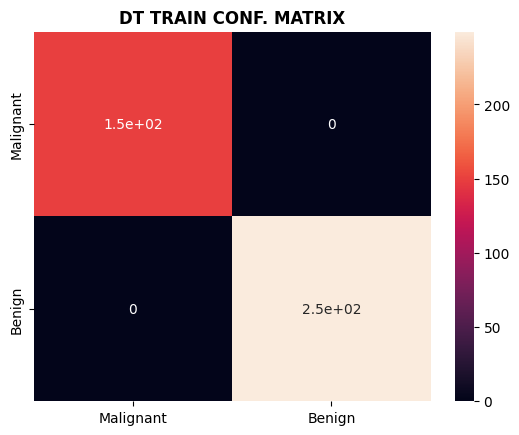


DT Test Confusion Matrix:
           Malignant  Benign
Malignant         59       4
Benign            11      97



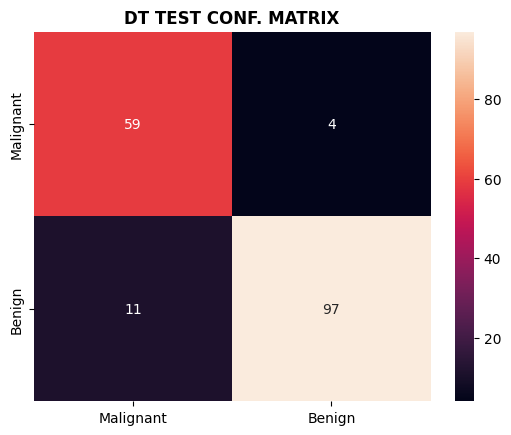


              precision    recall  f1-score   support

   Malignant       0.84      0.94      0.89        63
      Benign       0.96      0.90      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.91       171
weighted avg       0.92      0.91      0.91       171



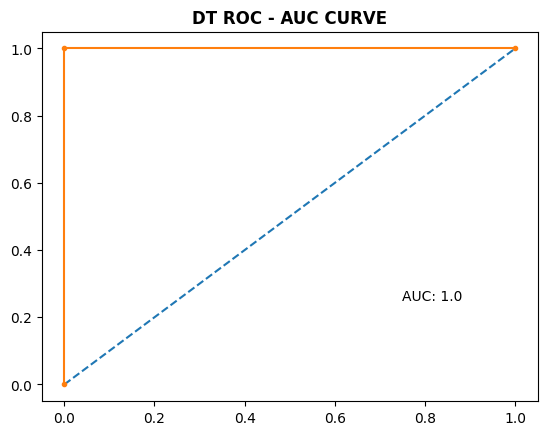

In [208]:
plotConfMat(model_name, cl1_dt_probabilities, trainSet[yVar], trainModel[columnsNames], testSet[yVar], testModel[columnsNames])
trainModelMetrics, testModelMetrics = calculateMetrics(0, trainModelMetrics, testModelMetrics, trainSet[yVar], trainModel[columnsNames], testSet[yVar], testModel[columnsNames])

In [209]:
model_name = 'KNN'
columnsNames = model_name + ' Tumor_type'

In [210]:
# Perform classification with KNN
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(trainSet[xVar], trainSet[yVar])

trainModel[columnsNames] = classifier_knn.predict(trainSet[xVar])
testModel[columnsNames] = classifier_knn.predict(testSet[xVar])

knn_probabilities = classifier_knn.predict_proba(testSet[xVar])
# keep probabilities for first class only
cl1_knn_probabilities = knn_probabilities[:, 1]

print(testModel)

     Tumor_type  DT Tumor_type  KNN Tumor_type
512         0.0            0.0             0.0
457         1.0            1.0             1.0
439         1.0            1.0             1.0
298         1.0            1.0             1.0
37          1.0            1.0             1.0
..          ...            ...             ...
7           0.0            0.0             0.0
408         0.0            0.0             0.0
523         1.0            1.0             1.0
361         1.0            1.0             1.0
553         1.0            1.0             1.0

[171 rows x 3 columns]


KNN Train Confusion Matrix:
           Malignant  Benign
Malignant        141       8
Benign             3     246



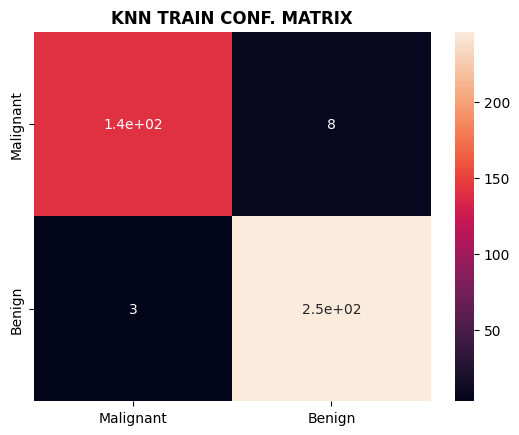


KNN Test Confusion Matrix:
           Malignant  Benign
Malignant         59       4
Benign             1     107



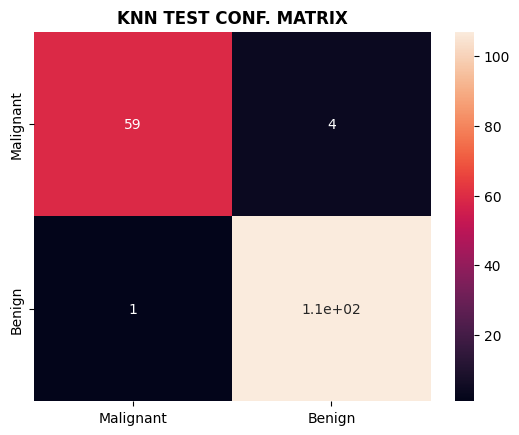


              precision    recall  f1-score   support

   Malignant       0.98      0.94      0.96        63
      Benign       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



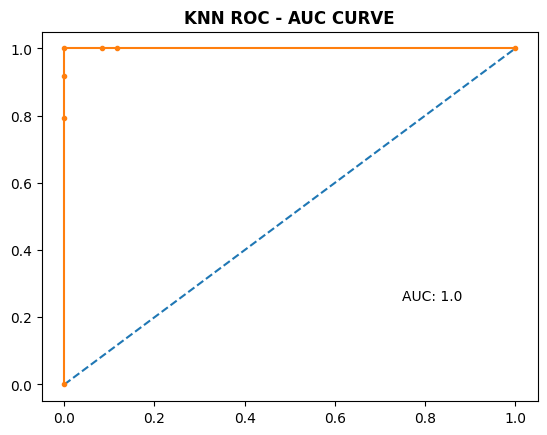

In [211]:
plotConfMat(model_name, cl1_knn_probabilities, trainSet[yVar], trainModel[columnsNames], testSet[yVar], testModel[columnsNames])
trainModelMetrics, testModelMetrics = calculateMetrics(1, trainModelMetrics, testModelMetrics, trainSet[yVar], trainModel[columnsNames], testSet[yVar], testModel[columnsNames])

In [212]:
model_name = 'LR'
columnsNames = model_name + ' Tumor_type'

In [213]:
# Perform classification with LR
classifier_lr = LogisticRegression()
classifier_lr.fit(trainSet[xVar], trainSet[yVar])

trainModel[columnsNames] = classifier_lr.predict(trainSet[xVar])
testModel[columnsNames] = classifier_lr.predict(testSet[xVar])
print(testModel)

lr_probabilities = classifier_lr.predict_proba(testSet[xVar])
# keep probabilities for first class only
cl1_lr_probabilities = lr_probabilities[:, 1]

print(testModel)

     Tumor_type  DT Tumor_type  KNN Tumor_type  LR Tumor_type
512         0.0            0.0             0.0            0.0
457         1.0            1.0             1.0            1.0
439         1.0            1.0             1.0            1.0
298         1.0            1.0             1.0            1.0
37          1.0            1.0             1.0            1.0
..          ...            ...             ...            ...
7           0.0            0.0             0.0            0.0
408         0.0            0.0             0.0            0.0
523         1.0            1.0             1.0            1.0
361         1.0            1.0             1.0            1.0
553         1.0            1.0             1.0            1.0

[171 rows x 4 columns]
     Tumor_type  DT Tumor_type  KNN Tumor_type  LR Tumor_type
512         0.0            0.0             0.0            0.0
457         1.0            1.0             1.0            1.0
439         1.0            1.0             1.0

LR Train Confusion Matrix:
           Malignant  Benign
Malignant        137      12
Benign             2     247



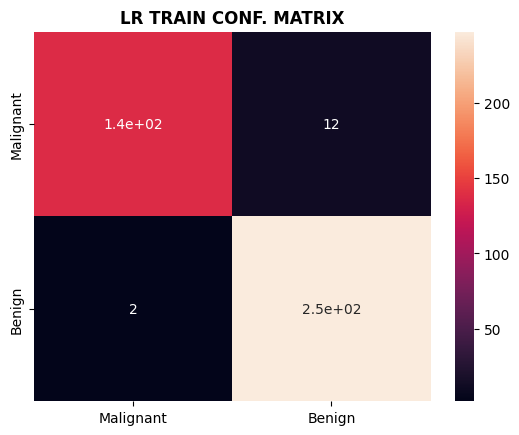


LR Test Confusion Matrix:
           Malignant  Benign
Malignant         56       7
Benign             1     107



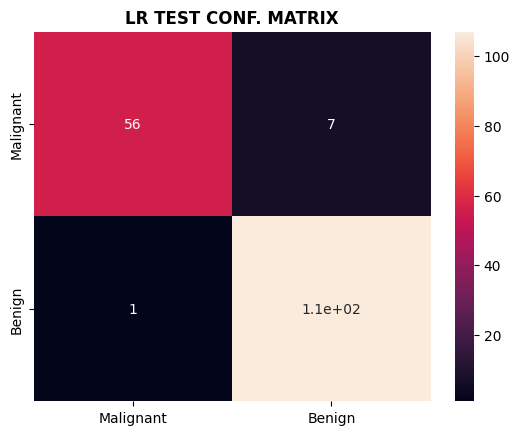


              precision    recall  f1-score   support

   Malignant       0.98      0.89      0.93        63
      Benign       0.94      0.99      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



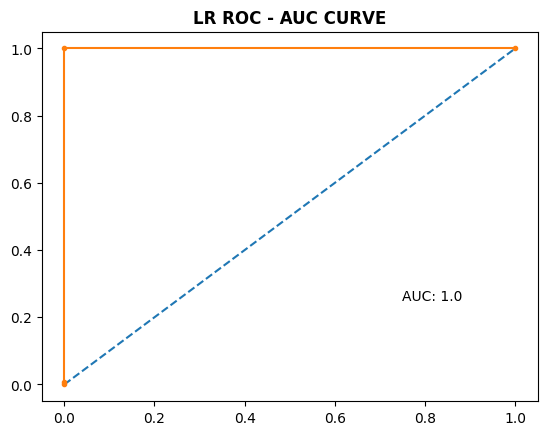

In [214]:
plotConfMat(model_name, cl1_lr_probabilities, trainSet[yVar], trainModel[columnsNames], testSet[yVar], testModel[columnsNames])
trainModelMetrics, testModelMetrics = calculateMetrics(2, trainModelMetrics, testModelMetrics, trainSet[yVar], trainModel[columnsNames], testSet[yVar], testModel[columnsNames])

In [215]:
model_name = 'GNB'
columnsNames = model_name + ' Tumor_type'

In [216]:
# Perform classification with GNB
classifier_gnb = GaussianNB()
classifier_gnb.fit(trainSet[xVar], trainSet[yVar])

trainModel[columnsNames] = classifier_gnb.predict(trainSet[xVar])
testModel[columnsNames] = classifier_gnb.predict(testSet[xVar])

gnb_probabilities = classifier_gnb.predict_proba(testSet[xVar])
# keep probabilities for first class only
cl1_gnb_probabilities = gnb_probabilities[:, 1]

print(testModel)

     Tumor_type  DT Tumor_type  KNN Tumor_type  LR Tumor_type  GNB Tumor_type
512         0.0            0.0             0.0            0.0             0.0
457         1.0            1.0             1.0            1.0             1.0
439         1.0            1.0             1.0            1.0             1.0
298         1.0            1.0             1.0            1.0             1.0
37          1.0            1.0             1.0            1.0             1.0
..          ...            ...             ...            ...             ...
7           0.0            0.0             0.0            0.0             0.0
408         0.0            0.0             0.0            0.0             0.0
523         1.0            1.0             1.0            1.0             1.0
361         1.0            1.0             1.0            1.0             1.0
553         1.0            1.0             1.0            1.0             1.0

[171 rows x 5 columns]


GNB Train Confusion Matrix:
           Malignant  Benign
Malignant        133      16
Benign             7     242



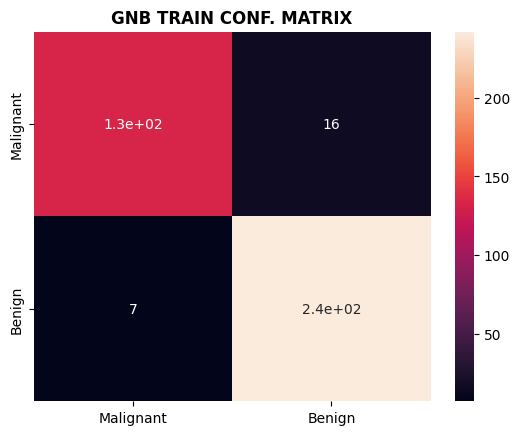


GNB Test Confusion Matrix:
           Malignant  Benign
Malignant         57       6
Benign             9      99



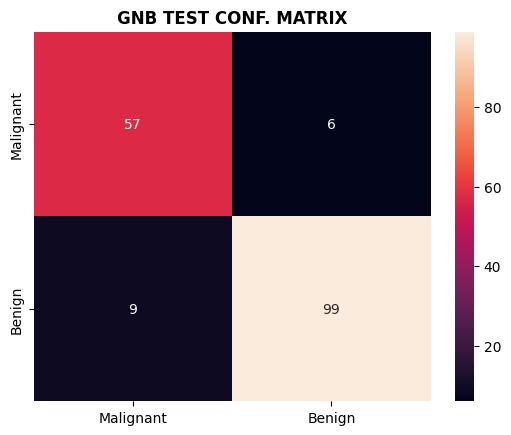


              precision    recall  f1-score   support

   Malignant       0.86      0.90      0.88        63
      Benign       0.94      0.92      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171



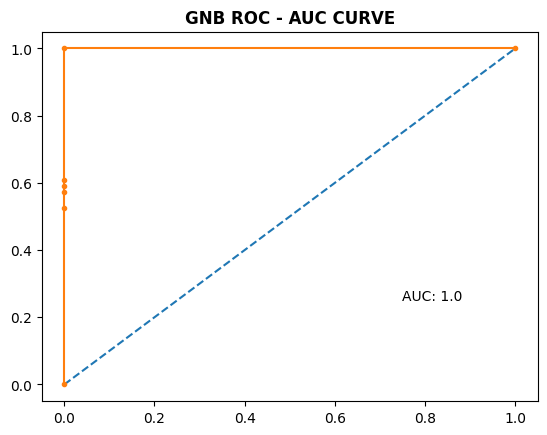

In [217]:
plotConfMat(model_name, cl1_gnb_probabilities, trainSet[yVar], trainModel[columnsNames], testSet[yVar], testModel[columnsNames])
trainModelMetrics, testModelMetrics = calculateMetrics(3, trainModelMetrics, testModelMetrics, trainSet[yVar], trainModel[columnsNames], testSet[yVar], testModel[columnsNames])

In [218]:
print("=======================================================================")
print("                      MODEL PERFORMANCE COMPARISON")
print("-----------------------------------------------------------------------")
print("                      Training")
print("-----------------------------------------------------------------------")
print(trainModelMetrics)
print("-----------------------------------------------------------------------")
print("                      Testing")
print("-----------------------------------------------------------------------")
print(testModelMetrics)
print("\n")

                      MODEL PERFORMANCE COMPARISON
-----------------------------------------------------------------------
                      Training
-----------------------------------------------------------------------
     accuracy precision    recall  f1-score
DT        1.0       1.0       1.0       1.0
KNN  0.972362  0.973835   0.96713  0.970294
LR   0.964824   0.96964  0.955715  0.961915
GNB  0.942211  0.943992  0.932252  0.937525
-----------------------------------------------------------------------
                      Testing
-----------------------------------------------------------------------
     accuracy precision    recall  f1-score
DT   0.912281  0.901627  0.917328  0.907724
KNN   0.97076  0.973649  0.963624  0.968259
LR   0.953216  0.960526  0.939815  0.948649
GNB  0.912281  0.903247  0.910714  0.906649


